## Importing The Essentials

In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew, kurtosis

## Loading Dataset

In [108]:
pd.set_option('display.MAX_COLUMNS', None)
data = pd.read_csv('CSI_6_ARI_CW_2_26.csv')

#### Let's take a peek into the Data

In [3]:
data.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,DepartureArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,Male,Loyal Customer,40,Business travel,Business,2969,3,3,3,3,5,5,5,5,5,5,5,5,5,4,0,5.0,satisfied
1,Female,Loyal Customer,13,Personal Travel,Eco,668,3,5,3,4,3,3,3,3,3,2,5,4,5,3,0,0.0,neutral or dissatisfied
2,Female,disloyal Customer,42,Business travel,Business,868,5,5,5,1,2,5,2,2,5,4,5,3,4,2,2,8.0,satisfied
3,Male,disloyal Customer,40,Business travel,Business,309,3,3,3,3,2,3,2,2,3,2,5,4,4,2,0,0.0,neutral or dissatisfied
4,Female,disloyal Customer,23,Business travel,Eco Plus,325,3,3,3,2,4,3,4,4,1,4,1,4,5,4,9,6.0,neutral or dissatisfied


## Data Analysis

<AxesSubplot:>

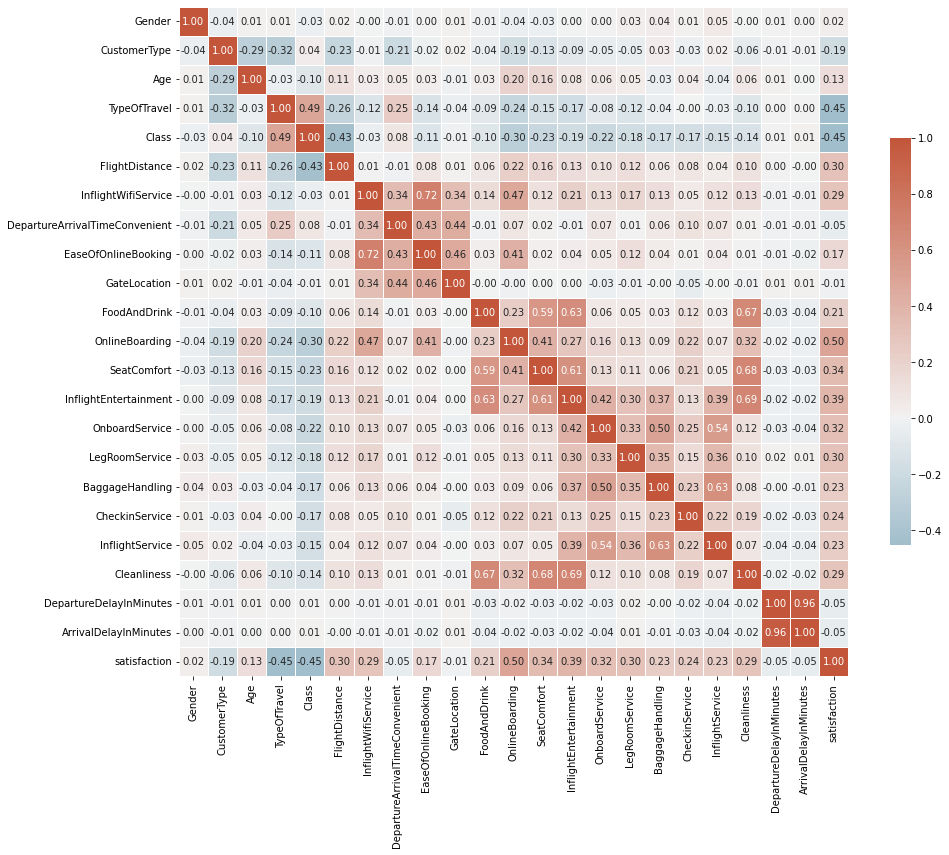

In [119]:
correlation_matrix = data.corr()
plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, center=0, fmt=".2f",
            annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

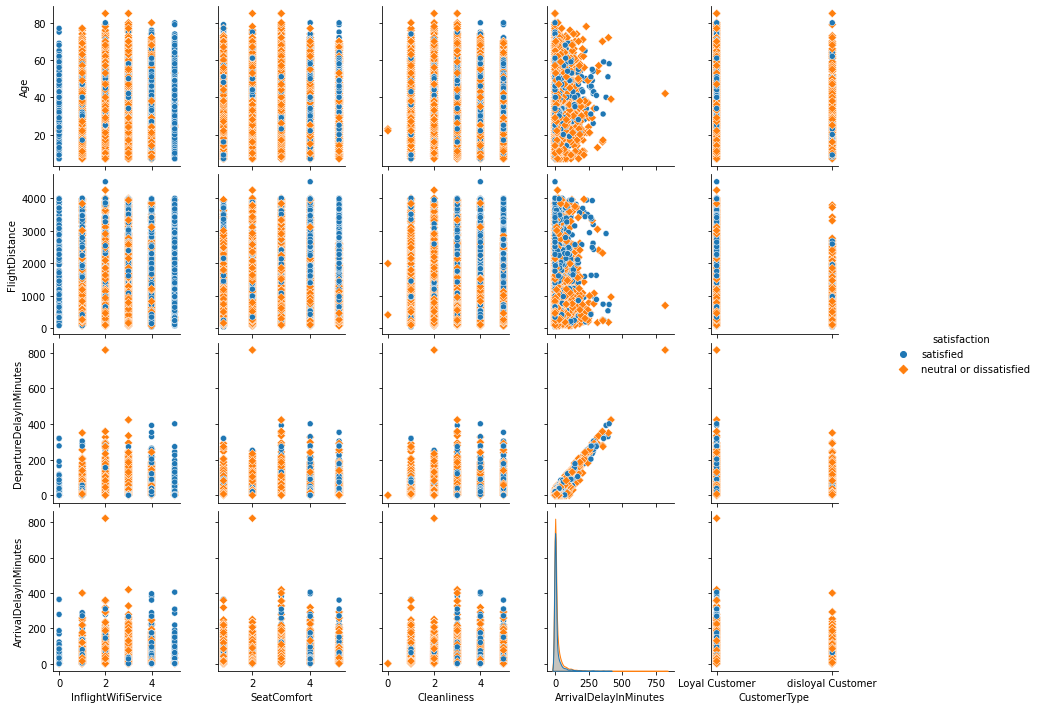

In [109]:
sns.pairplot(data, hue="satisfaction", markers=["o", "D"],x_vars=['InflightWifiService', 'SeatComfort', 'Cleanliness',
                                                                   'ArrivalDelayInMinutes', 'CustomerType'],
            y_vars=['Age', 'FlightDistance', 'DepartureDelayInMinutes',
                                                                   'ArrivalDelayInMinutes'])

# Preprocessing the Data

#### Checking for Categorical Columns, Columns that contains missing values and intiger or float columns

In [112]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
mis_cols = [col for col in data.columns if data[col].isnull().any()]
int_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

In [113]:
print(mis_cols)
print(data[mis_cols].isna().sum())

['ArrivalDelayInMinutes']
ArrivalDelayInMinutes    30
dtype: int64


#### there are 30 values missing, we can replace them by mean value.

In [114]:
data[mis_cols] = data[mis_cols].fillna(value=data[mis_cols].mean())
mis_cols = [col for col in data.columns if data[col].isnull().any()]
print(mis_cols)

[]


#### Now as you can see there are no missing values.

## Now Transforming The Categorical Columns

In [115]:
print(cat_cols)

['Gender', 'CustomerType', 'TypeOfTravel', 'Class', 'satisfaction']


In [116]:
encoder = OrdinalEncoder()
data[cat_cols] = encoder.fit_transform(data[cat_cols])

In [117]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(cat_cols)

[]


#### Now as the Categorical Columns have also been dealt with, we can scale all the int and float cloumns to reduce complex calculations in the models.

## Scalling

In [118]:
scaler = MinMaxScaler()
data[int_cols] = scaler.fit_transform(data[int_cols])

#### Now let's take a quick peek again.

In [18]:
data.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiService,DepartureArrivalTimeConvenient,EaseOfOnlineBooking,GateLocation,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnboardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,1.0,0.0,0.423077,0.0,0.0,0.657124,0.6,0.6,0.6,0.50,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,0.8,0.000000,0.006083,1.0
1,0.0,0.0,0.076923,1.0,1.0,0.142474,0.6,1.0,0.6,0.75,0.6,0.6,0.50,0.6,0.6,0.4,1.0,0.75,1.0,0.6,0.000000,0.000000,0.0
2,0.0,1.0,0.448718,0.0,0.0,0.187206,1.0,1.0,1.0,0.00,0.4,1.0,0.25,0.4,1.0,0.8,1.0,0.50,0.8,0.4,0.002454,0.009732,1.0
3,1.0,1.0,0.423077,0.0,0.0,0.062178,0.6,0.6,0.6,0.50,0.4,0.6,0.25,0.4,0.6,0.4,1.0,0.75,0.8,0.4,0.000000,0.000000,0.0
4,0.0,1.0,0.205128,0.0,2.0,0.065757,0.6,0.6,0.6,0.25,0.8,0.6,0.75,0.8,0.2,0.8,0.0,0.75,1.0,0.8,0.011043,0.007299,0.0


#### As you can see the Data is set to be trained

# Splitting into Training and Validation Set

In [20]:
y = data.iloc[:, -1].values
X = data.iloc[:, 0:-1].values

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=1)

# Training ANN model.

In [26]:
model = keras.models.Sequential()
model.add(layers.Dense(12, input_shape=(22,), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [28]:
callback = EarlyStopping(monitor='loss', patience=10, min_delta=0)

In [29]:
model.fit(X_train, y_train, epochs=200, callbacks=[callback])

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7751
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8418
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8581
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8674
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8745
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8796
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8851
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8889
Epoch 9/200
250/250 [==============================] - 1s 5ms/step - loss: 0.2789 - accuracy: 0.8925
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.2705 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9461: 0s - loss: 0.1397 - accuracy: 0.94
Epoch 81/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9467
Epoch 82/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9479
Epoch 83/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9475
Epoch 84/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9466
Epoch 85/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.9451
Epoch 86/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9475
Epoch 87/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9473
Epoch 88/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9471
Epoch 89/200
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9505
Epoch 160/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9517
Epoch 161/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9549
Epoch 162/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9529
Epoch 163/200
250/250 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9539
Epoch 164/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9555
Epoch 165/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9528
Epoch 166/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9529
Epoch 167/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9563
Epoch 168/200
250/250 [==============================] - 0s 1ms/step - loss: 0.1203 - a

<AxesSubplot:>

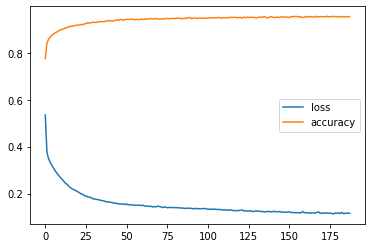

In [30]:
history = pd.DataFrame(model.history.history)
history.plot()

In [31]:
preds = model.predict(X_valid)
preds = preds.round().astype(int)

In [107]:
ANN_cm = confusion_matrix(y_valid, preds)
ANN_accu = accuracy_score(y_valid, preds)
print(ANN_cm)
print('ANN\'s Accuracy' , str(np.around(ANN_accu*100, decimals = 2)) + '%')
print('ANN\'s Error' , str(np.around((1 - ANN_accu) * 100, decimals=2)) + '%')

[[1085   46]
 [  46  823]]
ANN's Accuracy 95.4%
ANN's Error 4.6%


# RandomForest

In [103]:
regressor = RandomForestRegressor(n_estimators=500, max_depth=15)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=500)

In [104]:
reg_pred = regressor.predict(X_valid)
reg_pred = reg_pred.round().astype(int)

In [105]:
reg_cm = confusion_matrix(y_valid, reg_pred)
Reg_accu = accuracy_score(y_valid,reg_pred)
print(reg_cm)
print('RandomForestRegressor Accuracy: ', str(np.around(Reg_accu*100, decimals=2)) + '%')
print('RandomForestRegressor Error: ', str(np.around((1 - Reg_accu) * 100, decimals=2)) + '%')

[[1099   32]
 [  47  822]]
RandomForestRegressor Accuracy:  96.05%
RandomForestRegressor Error:  3.95%
